# <<-----------------------House Price Prediction--------------------->>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

In [4]:
## Let's check the head of the Data
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
##Let's check the shape of the data
df.shape

(29451, 12)

In [6]:
## Let's check if any null values exist in our dataset or not
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
##The datasets seems clean
#Let's see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


## Let's Perform EDA

In [8]:
##Let's see how many categorical columns are there in our dataset
cat_cols=[col for col in df.columns if df[col].dtypes=="O"]

In [9]:
cat_cols

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [10]:
df[cat_cols]

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"
...,...,...,...
29446,Owner,BHK,"Shamshabad Road,Agra"
29447,Owner,BHK,"E3-108, Lake View Recidency,,Vapi"
29448,Dealer,BHK,"Ajmer Road,Jaipur"
29449,Owner,BHK,"Sholinganallur,Chennai"


In [11]:
##Let's see posted owner

In [12]:
df["POSTED_BY"].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

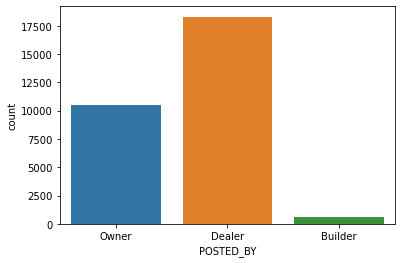

In [13]:
sns.countplot(df["POSTED_BY"])

In [14]:
## Let's See How Price of the House Varies According the Posted member
df.groupby("POSTED_BY")["TARGET(PRICE_IN_LACS)"].mean()

POSTED_BY
Builder    245.705627
Dealer     186.774735
Owner       60.674264
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [15]:
## As you can see ,if Builder Posts the project it will be higher price.

In [16]:
## let's see how many buildings are in construction
df["UNDER_CONSTRUCTION"].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

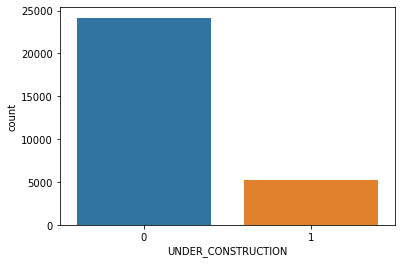

In [17]:
sns.countplot(df["UNDER_CONSTRUCTION"])

In [18]:
## Let's Visulaize the Rera columns
##RERA- Rear state regularity Act
## It was formed to bring transperency in Real Estate Sector
df["RERA"].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

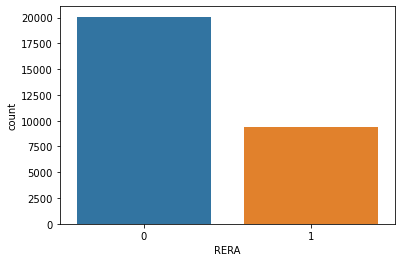

In [19]:
sns.countplot(df["RERA"])

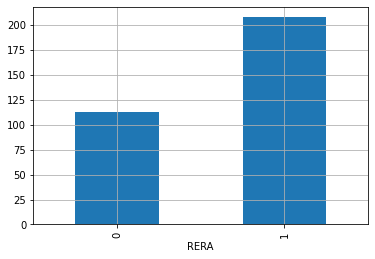

In [20]:
df.groupby("RERA")["TARGET(PRICE_IN_LACS)"].mean().plot(kind="bar",grid=True)

In [21]:
## It is ovibous that RERA approved buliding are of Higher Price
##Because it aims to reduce project delays and mis-selling.

In [22]:
## Let's See on BHK_NO which represents number of rooms
df["BHK_NO."].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [23]:
##As we can see we number of rooms ranging from 1 to 17
#But generally we don't have more than 6 columns as you can see from the distribution
## The values that are greater than 6 can be treated as potential outliers
## Let's Remove this Values From Our dataset
df2=df[df["BHK_NO."]<7]

In [24]:
df2.shape

(29409, 12)

In [25]:
len(df2)/len(df)*100

99.85739024141796

In [26]:
df2["BHK_NO."].value_counts()

2    13324
3    10546
1     3574
4     1723
5      190
6       52
Name: BHK_NO., dtype: int64

In [27]:
df2.groupby(["BHK_NO."])["TARGET(PRICE_IN_LACS)"].mean()

BHK_NO.
1     72.563433
2     97.176584
3    176.329423
4    350.820255
5    604.187895
6    868.842308
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [28]:
## As you can see as the number of rooms increases , price of the house decrease

In [29]:
## Let's See how many are RK and How Many are BHK
df2["BHK_OR_RK"].value_counts()

BHK    29385
RK        24
Name: BHK_OR_RK, dtype: int64

In [30]:
## RK means Rooms and Kitchen which mean in a single big room there is kitchen and room attached 
## These type of housese are rare and used in old days

In [31]:
df2[df2["BHK_OR_RK"]=="RK"]["BHK_NO."].value_counts()

1    24
Name: BHK_NO., dtype: int64

In [32]:
## As you can see these are only single rooms
## Hence it would be better to remove these values.
## As after removing this value we have only BHK value left in that column , It would be better to remove this columns

In [33]:
df3=df2[df2["BHK_OR_RK"]!="RK"]

In [34]:
df3.drop(columns=["BHK_OR_RK"],inplace=True)

In [35]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [36]:
## Let's See SQUARE_FT columns
df["SQUARE_FT"]

0        1300.236407
1        1275.000000
2         933.159722
3         929.921143
4         999.009247
            ...     
29446    2500.000000
29447     769.230769
29448    1022.641509
29449     927.079009
29450     896.774194
Name: SQUARE_FT, Length: 29451, dtype: float64

KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

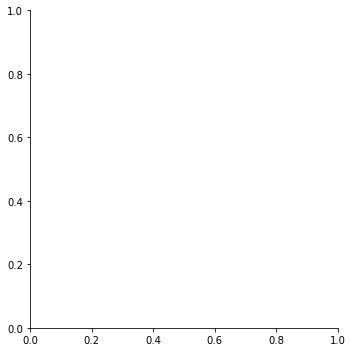

In [50]:
plt.figure(figsize=(10,5))
sns.displot(df3["SQUARE_FT"])

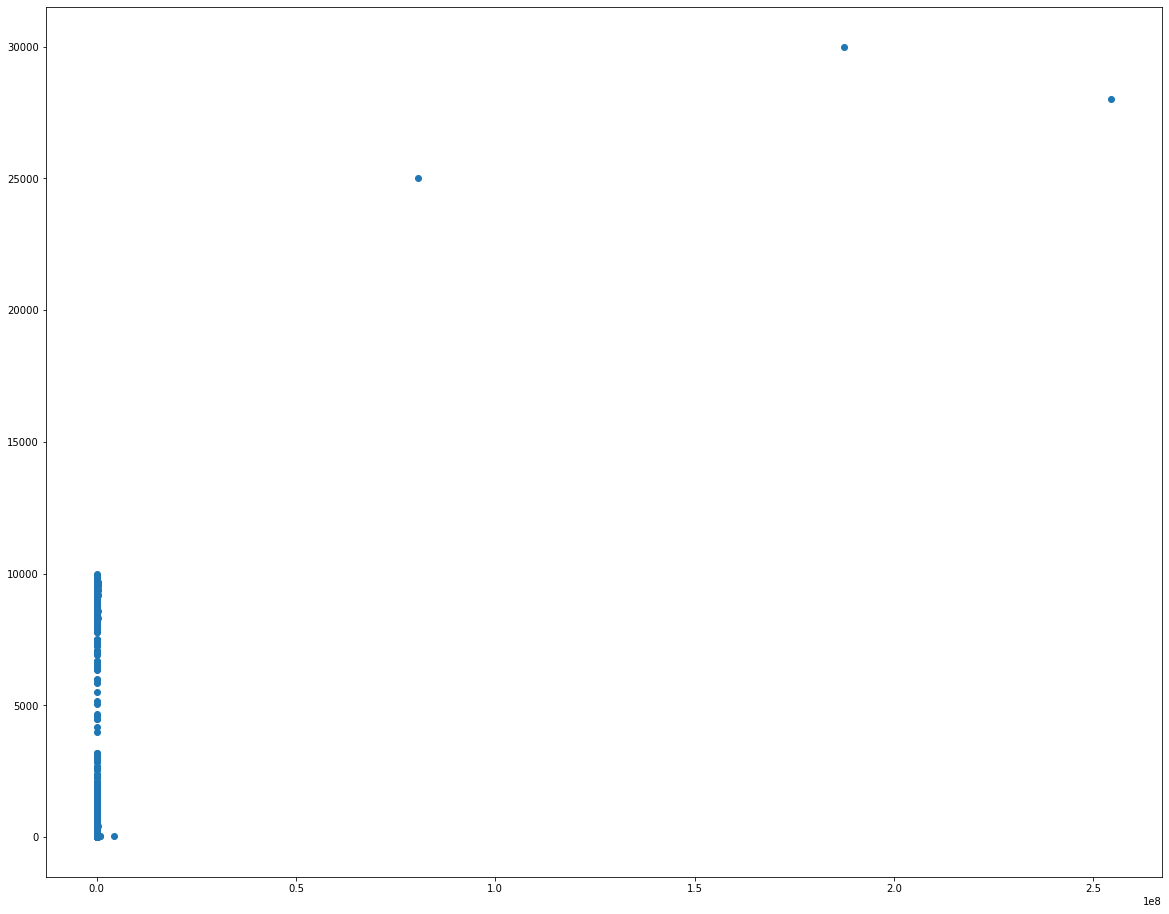

In [37]:
## Let's See the scatter plot between squaers
plt.figure(figsize=(20,16))
plt.scatter(x=df3["SQUARE_FT"],y=df3["TARGET(PRICE_IN_LACS)"])

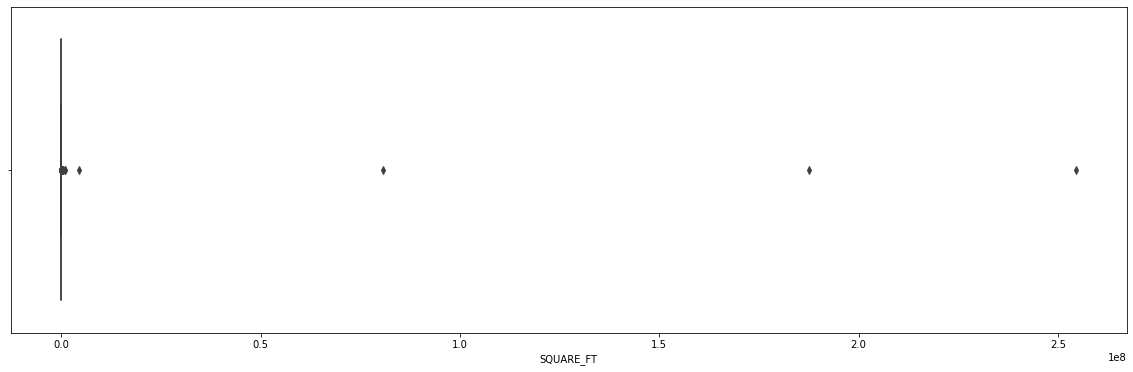

In [38]:
plt.figure(figsize=(20,6))
sns.boxplot(df3["SQUARE_FT"])

In [39]:
df3[df3["SQUARE_FT"]>3*1e5]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
373,Owner,0,0,4,4.333333e+05,1,1,"Mulanthuruthy,Kochi",9.893479,76.408774,65.0
10745,Owner,0,0,3,2.545455e+08,1,1,"Malur,Bangalore",13.021000,77.938000,28000.0
11238,Dealer,0,0,3,1.875000e+08,1,1,"R.T. Nagar,Bangalore",13.018900,77.596300,30000.0
15598,Owner,0,0,3,7.928571e+05,1,1,"Sainik Colony,Jammu",32.674044,74.907348,55.5
15724,Owner,0,0,2,8.064516e+07,1,1,"Lakkasandra,Bangalore",12.795926,77.331535,25000.0
22155,Owner,0,0,1,3.400000e+05,1,1,"Sayajipura,Vadodara",22.323406,73.240395,17.0
25241,Owner,0,0,3,4.300000e+06,1,1,"New Kumaran Nagar,Chennai",10.810426,78.668914,43.0
28591,Owner,0,0,2,8.750000e+05,1,1,"Ajit Singh Nagar,Vijayawada",30.466084,74.501902,35.0


In [40]:
## These Eight values are potential Outliers.As square foot size is extremely high
##hence drop these values
df4=df3[df3["SQUARE_FT"]<3*1e5]

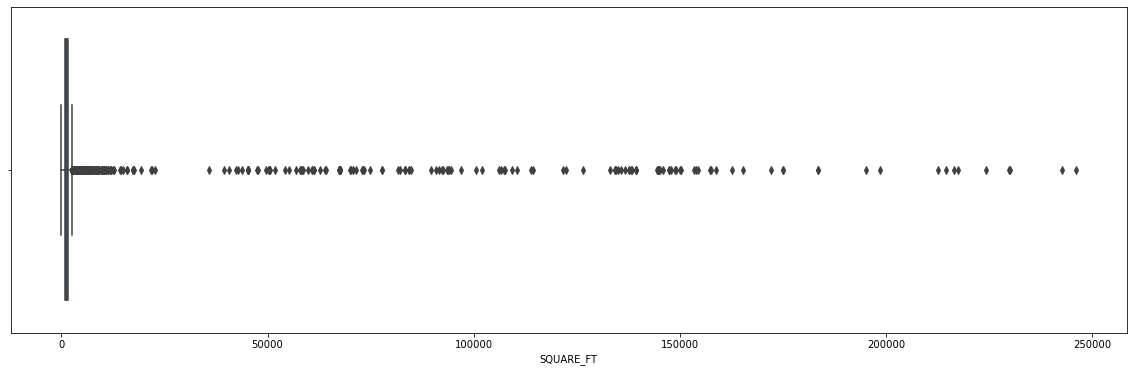

In [41]:
plt.figure(figsize=(20,6))
sns.boxplot(df4["SQUARE_FT"])

In [42]:
df4.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [43]:
## Let's see How many building are ready to move

In [44]:
df4["READY_TO_MOVE"].value_counts()

1    24098
0     5279
Name: READY_TO_MOVE, dtype: int64

In [45]:
df4.groupby("READY_TO_MOVE")["TARGET(PRICE_IN_LACS)"].mean()
## There is no much more difference in

READY_TO_MOVE
0    221.023724
1    121.468453
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [46]:
df4["RESALE"].value_counts()

1    27311
0     2066
Name: RESALE, dtype: int64

In [47]:
## As you can see most of the houses are resold
df4.groupby("RESALE")["TARGET(PRICE_IN_LACS)"].mean()

RESALE
0    640.193311
1    101.471628
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [48]:
## It is clearly seen that resold houses are relatively lower price

In [49]:
## Let's see the address columns

In [50]:
df4["ADDRESS"].value_counts()

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Surathkal,Mangalore                1
Tikrapara,Bilaspur                 1
shiyapura,Vadodara                 1
Shankarapuram,Bangalore            1
Sector-42 Noida,Noida              1
Name: ADDRESS, Length: 6868, dtype: int64

In [51]:
## As we can see in the address , at the end of each address there is a prominent city or state name
##Let's extract these citis and states from these columns

In [52]:
df4["ADDRESS"].apply(lambda x : x.split(",")[-1].strip())

0        Bangalore
1           Mysore
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29446         Agra
29447         Vapi
29448       Jaipur
29449      Chennai
29450       Jaipur
Name: ADDRESS, Length: 29377, dtype: object

In [53]:
## Let's store these values in a new column
df4["LOCATION"]=df4["ADDRESS"].apply(lambda x : x.split(",")[-1].strip())

In [54]:
df4["LOCATION"].value_counts()

Bangalore         4326
Lalitpur          2966
Mumbai            2022
Pune              1989
Noida             1767
Kolkata           1707
Maharashtra       1578
Chennai           1253
Ghaziabad         1087
Jaipur             960
Chandigarh         696
Faridabad          648
Mohali             556
Vadodara           509
Gurgaon            430
Surat              423
Nagpur             336
Lucknow            326
Indore             306
Bhubaneswar        234
Bhopal             218
Kochi              204
Visakhapatnam      178
Bhiwadi            161
Goa                149
Coimbatore         147
Dehradun           131
Ranchi             124
Mangalore          121
Gandhinagar        118
Sonipat            117
Secunderabad       108
Palghar            107
Kanpur              92
Raipur              89
Guwahati            89
Jamshedpur          86
Siliguri            83
Rajkot              83
Agra                83
Patna               82
Panchkula           82
Vijayawada          79
Jamnagar   

In [55]:
## Let's make the value of the loaction "Others" if that value is less frequent i.e less than 20

In [56]:
rare_values=list(df4["LOCATION"].value_counts()[df4["LOCATION"].value_counts()<15].index)

In [57]:
rare_values

['Karad',
 'Nainital',
 'Kakinada',
 'Kannur',
 'Chandrapur',
 'Alwar',
 'Durg',
 'Amritsar',
 'Wardha',
 'Latur',
 'Puri',
 'Kanchipuram',
 'Karnal',
 'Akola',
 'Bareilly',
 'Gandhidham',
 'Hazaribagh',
 'Tirunelveli',
 'Tenali',
 'Cuttack',
 'Bardhaman',
 'Moradabad',
 'Rohtak',
 'Ongole',
 'Rewari',
 'Jhansi',
 'Berhampur',
 'Eluru',
 'Morbi',
 'Kollam',
 'Haldwani',
 'Muzaffarpur',
 'Palwal',
 'Shirdi',
 'Bhimavaram',
 'Raigarh',
 'Bokaro',
 'Anantapur',
 'Dharwad',
 'Gaya',
 'Nadiad',
 'Ujjain',
 'Gulbarga',
 'Panipat',
 'Jammu',
 'Ambala',
 'Kharagpur',
 'Thanjavur',
 'Warangal',
 'Nanded',
 'Godhra',
 'Hosur',
 'Dhule',
 'Bhagalpur',
 'Sikar',
 'Rishikesh',
 'Porbandar',
 'Hapur',
 'Jalna',
 'Gadhinglaj',
 'Erode',
 'Thoothukudi',
 'Bhandara',
 'Hoshangabad',
 'Dalhousie',
 'Satna',
 'Pathanamthitta',
 'Salem',
 'Roorkee',
 'Srikakulam',
 'Rourkela',
 'Bankura',
 'Baddi',
 'Jind',
 'Hoshiarpur',
 'Bhiwani',
 'Bikaner',
 'Barabanki',
 'Arrah',
 'Ooty',
 'Karwar',
 'Gurdaspur',
 '

In [58]:
df4["LOCATION"].replace(rare_values,"Others",inplace=True)

In [59]:
df4["LOCATION"].value_counts()

Bangalore        4326
Lalitpur         2966
Mumbai           2022
Pune             1989
Noida            1767
Kolkata          1707
Maharashtra      1578
Chennai          1253
Ghaziabad        1087
Jaipur            960
Chandigarh        696
Faridabad         648
Mohali            556
Others            540
Vadodara          509
Gurgaon           430
Surat             423
Nagpur            336
Lucknow           326
Indore            306
Bhubaneswar       234
Bhopal            218
Kochi             204
Visakhapatnam     178
Bhiwadi           161
Goa               149
Coimbatore        147
Dehradun          131
Ranchi            124
Mangalore         121
Gandhinagar       118
Sonipat           117
Secunderabad      108
Palghar           107
Kanpur             92
Raipur             89
Guwahati           89
Jamshedpur         86
Rajkot             83
Agra               83
Siliguri           83
Panchkula          82
Patna              82
Vijayawada         79
Aurangabad         66
Jamnagar  

In [60]:
## Let's drop ADDRESS column
## As Latitude and Longitude are Specific to that address let's drop this also


In [61]:
df5=df4.drop(columns=["ADDRESS","LATITUDE","LONGITUDE"])

In [62]:
locations_values=list(df5["LOCATION"].unique())

In [63]:
locations_values

['Bangalore',
 'Mysore',
 'Ghaziabad',
 'Kolkata',
 'Kochi',
 'Jaipur',
 'Mohali',
 'Chennai',
 'Siliguri',
 'Noida',
 'Raigad',
 'Bhubaneswar',
 'Others',
 'Pune',
 'Mumbai',
 'Nagpur',
 'Bhiwadi',
 'Faridabad',
 'Lalitpur',
 'Maharashtra',
 'Vadodara',
 'Visakhapatnam',
 'Vapi',
 'Mangalore',
 'Aurangabad',
 'Vijayawada',
 'Belgaum',
 'Bhopal',
 'Lucknow',
 'Kanpur',
 'Gandhinagar',
 'Pondicherry',
 'Agra',
 'Ranchi',
 'Gurgaon',
 'Udupi',
 'Indore',
 'Jodhpur',
 'Coimbatore',
 'Valsad',
 'Palghar',
 'Surat',
 'Varanasi',
 'Guwahati',
 'Amravati',
 'Anand',
 'Tirupati',
 'Secunderabad',
 'Raipur',
 'Vizianagaram',
 'Thrissur',
 'Madurai',
 'Chandigarh',
 'Shimla',
 'Gwalior',
 'Rajkot',
 'Sonipat',
 'Allahabad',
 'Dharuhera',
 'Durgapur',
 'Panchkula',
 'Solapur',
 'Goa',
 'Jamshedpur',
 'Jabalpur',
 'Hubli',
 'Patna',
 'Bilaspur',
 'Ratnagiri',
 'Meerut',
 'Jalandhar',
 'Ludhiana',
 'Kota',
 'Panaji',
 'Kolhapur',
 'Ernakulam',
 'Bhavnagar',
 'Bharuch',
 'Asansol',
 'Margao',
 'Bhil

In [111]:
cat_col=[col for col in df5.columns if df5[col].dtypes =="O"]

In [112]:
cat_col

['POSTED_BY', 'LOCATION']

In [113]:
## Let's use label encoding to fill the value of categorical columns

In [114]:
df5["POSTED_BY"].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [115]:
posted_map={"Owner":0,"Dealer":1,"Builder":2}

In [69]:
all_loc=list(df5.groupby("LOCATION")["TARGET(PRICE_IN_LACS)"].mean().sort_values().index)

In [70]:
location_map={loc:i for i,loc in enumerate(all_loc)}

In [71]:
location_map

{'Karjat': 0,
 'Bhavnagar': 1,
 'Rudrapur': 2,
 'Palghar': 3,
 'Junagadh': 4,
 'Durgapur': 5,
 'Ratnagiri': 6,
 'Bharuch': 7,
 'Vapi': 8,
 'Neemrana': 9,
 'Bhiwadi': 10,
 'Valsad': 11,
 'Bhilai': 12,
 'Navsari': 13,
 'Asansol': 14,
 'Vizianagaram': 15,
 'Jamnagar': 16,
 'Haridwar': 17,
 'Mathura': 18,
 'Raigad': 19,
 'Meerut': 20,
 'Sindhudurg': 21,
 'Bilaspur': 22,
 'Solan': 23,
 'Dhanbad': 24,
 'Bhopal': 25,
 'Aurangabad': 26,
 'Nellore': 27,
 'Hubli': 28,
 'Raipur': 29,
 'Amravati': 30,
 'Ajmer': 31,
 'Dharuhera': 32,
 'Solapur': 33,
 'Kolhapur': 34,
 'Siliguri': 35,
 'Gwalior': 36,
 'Others': 37,
 'Ahmednagar': 38,
 'Agra': 39,
 'Udupi': 40,
 'Aligarh': 41,
 'Jodhpur': 42,
 'Gandhinagar': 43,
 'Guntur': 44,
 'Anand': 45,
 'Bahadurgarh': 46,
 'Belgaum': 47,
 'Indore': 48,
 'Jamshedpur': 49,
 'Margao': 50,
 'Rajkot': 51,
 'Palakkad': 52,
 'Madurai': 53,
 'Sonipat': 54,
 'Kota': 55,
 'Vijayawada': 56,
 'Jabalpur': 57,
 'Pondicherry': 58,
 'Guwahati': 59,
 'Jalandhar': 60,
 'Allahabad'

In [128]:
df5["LOCATION"]=df5["LOCATION"].map(location_map)

In [130]:
df5["POSTED_BY"]=df5["POSTED_BY"].map(posted_map)

In [134]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29377 entries, 0 to 29450
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29377 non-null  int64  
 1   UNDER_CONSTRUCTION     29377 non-null  int64  
 2   RERA                   29377 non-null  int64  
 3   BHK_NO.                29377 non-null  int64  
 4   SQUARE_FT              29377 non-null  float64
 5   READY_TO_MOVE          29377 non-null  int64  
 6   RESALE                 29377 non-null  int64  
 7   TARGET(PRICE_IN_LACS)  29377 non-null  float64
 8   LOCATION               29377 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 2.2 MB


## Let's see correlation plot

In [135]:
##Let's plot correlation between output and input features

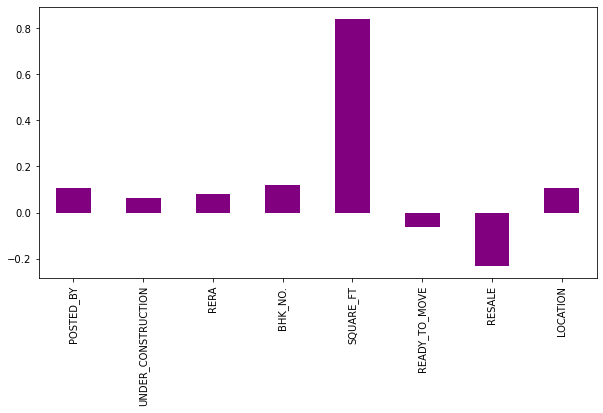

In [142]:
plt.figure(figsize=(10,5))
df5.drop(columns=["TARGET(PRICE_IN_LACS)"]).corrwith(df["TARGET(PRICE_IN_LACS)"]).plot(kind="bar",color="purple")

In [143]:
## As you can see the square foot column is more correlated

In [147]:
## Let's see correlation betweem input features

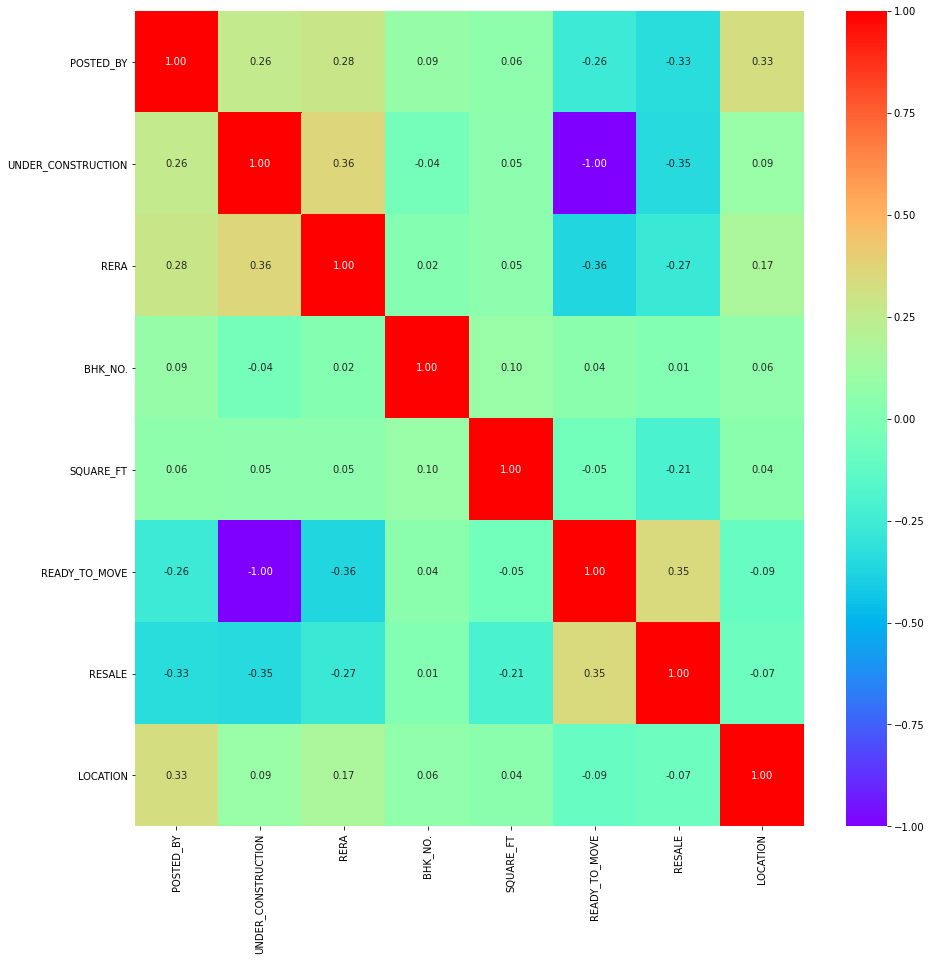

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(df5.drop(columns=["TARGET(PRICE_IN_LACS)"]).corr(),cmap="rainbow",fmt=".2f",annot=True)

In [149]:
## As I can see there is high correlation betwwen under construction and ready to move. The realtion is clear that as the house is under cnstruction it is not ready to use hence drop it

In [151]:
df5.drop(columns=["UNDER_CONSTRUCTION"],inplace=True)

### Model Building

In [152]:
X=df5.drop(columns=["TARGET(PRICE_IN_LACS)"])
y=df5["TARGET(PRICE_IN_LACS)"]

In [153]:
X.head()

,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LOCATION
0,0,0,2,1300.236407,1,1,97
1,1,0,2,1275.000000,1,1,76
2,0,0,2,933.159722,1,1,97
3,0,1,2,929.921143,1,1,67
4,1,0,2,999.009247,0,1,86


In [156]:
X.shape

(29377, 7)

In [155]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [157]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.15,random_state=100)

In [158]:
sc=StandardScaler()
train_X=sc.fit_transform(train_X)

In [159]:
test_X=sc.transform(test_X)

In [160]:
def check_test_score(model):
    pred=model.predict(test_X)
    print("R2 score is:", r2_score(test_y,pred))
    print("The mean squared error is :",mean_squared_error(test_y,pred))
    

In [161]:
lr=LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [162]:
check_test_score(lr)

R2 score is: 0.7945177179324279
The mean squared error is : 70028.41458409226


In [163]:
lasso=Lasso(random_state=100)
lasso.fit(train_X,train_y)

Lasso(random_state=100)

In [164]:
check_test_score(lasso)

R2 score is: 0.7942948719180659
The mean squared error is : 70104.36056310868


In [165]:
ridge=Ridge(random_state=100)
ridge.fit(train_X,train_y)

Ridge(random_state=100)

In [166]:
check_test_score(ridge)

R2 score is: 0.7945110126119608
The mean squared error is : 70030.6997590322


In [167]:
sv_regressor=SVR(kernel="linear")
sv_regressor.fit(train_X,train_y)

SVR(kernel='linear')

In [168]:
check_test_score(sv_regressor)

R2 score is: 0.7666366257093578
The mean squared error is : 79530.297985467


In [169]:
sv_regressor=SVR(kernel="rbf")
sv_regressor.fit(train_X,train_y)

SVR()

In [170]:
check_test_score(sv_regressor)

R2 score is: 0.010398217852529146
The mean squared error is : 337256.54190754256


In [171]:
dt=DecisionTreeRegressor()
dt.fit(train_X,train_y)

DecisionTreeRegressor()

In [172]:
check_test_score(dt)

R2 score is: 0.9314820321358683
The mean squared error is : 23350.941072724945


In [173]:
rf=RandomForestRegressor()

In [174]:
rf.fit(train_X,train_y)

RandomForestRegressor()

In [175]:
check_test_score(rf)

R2 score is: 0.9602519859120132
The mean squared error is : 13546.133425423675


In [176]:
gradient_bosting=GradientBoostingRegressor()
gradient_bosting.fit(train_X,train_y)

GradientBoostingRegressor()

In [177]:
check_test_score(gradient_bosting)

R2 score is: 0.9632687153803534
The mean squared error is : 12518.031246630959


In [178]:
cat_boost=CatBoostRegressor()
cat_boost.fit(train_X,train_y)

Learning rate set to 0.069206
0:	learn: 560.5714310	total: 239ms	remaining: 3m 58s
1:	learn: 528.3960133	total: 259ms	remaining: 2m 9s
2:	learn: 499.0446854	total: 276ms	remaining: 1m 31s
3:	learn: 472.9803222	total: 291ms	remaining: 1m 12s
4:	learn: 449.3856044	total: 305ms	remaining: 1m
5:	learn: 424.6236301	total: 318ms	remaining: 52.7s
6:	learn: 402.0667256	total: 332ms	remaining: 47s
7:	learn: 381.1751433	total: 345ms	remaining: 42.8s
8:	learn: 361.3440575	total: 359ms	remaining: 39.5s
9:	learn: 342.9833243	total: 373ms	remaining: 36.9s
10:	learn: 326.3858013	total: 386ms	remaining: 34.7s
11:	learn: 310.8480855	total: 400ms	remaining: 32.9s
12:	learn: 296.0605454	total: 422ms	remaining: 32.1s
13:	learn: 282.4306915	total: 446ms	remaining: 31.4s
14:	learn: 269.6021133	total: 478ms	remaining: 31.4s
15:	learn: 258.1645295	total: 495ms	remaining: 30.4s
16:	learn: 247.8012138	total: 509ms	remaining: 29.4s
17:	learn: 238.2221723	total: 523ms	remaining: 28.5s
18:	learn: 229.2610323	total

160:	learn: 112.1837870	total: 3.69s	remaining: 19.2s
161:	learn: 111.9055584	total: 3.72s	remaining: 19.3s
162:	learn: 111.6746912	total: 3.75s	remaining: 19.2s
163:	learn: 111.6128732	total: 3.77s	remaining: 19.2s
164:	learn: 111.5705240	total: 3.79s	remaining: 19.2s
165:	learn: 111.4930354	total: 3.82s	remaining: 19.2s
166:	learn: 111.2840834	total: 3.83s	remaining: 19.1s
167:	learn: 111.2518039	total: 3.88s	remaining: 19.2s
168:	learn: 111.0790254	total: 3.9s	remaining: 19.2s
169:	learn: 110.9793093	total: 3.91s	remaining: 19.1s
170:	learn: 110.8905241	total: 3.93s	remaining: 19s
171:	learn: 110.6370989	total: 3.96s	remaining: 19s
172:	learn: 110.5590526	total: 3.98s	remaining: 19s
173:	learn: 110.3594164	total: 4s	remaining: 19s
174:	learn: 110.1735317	total: 4.01s	remaining: 18.9s
175:	learn: 110.0758251	total: 4.03s	remaining: 18.9s
176:	learn: 109.9906436	total: 4.08s	remaining: 19s
177:	learn: 109.7801643	total: 4.1s	remaining: 18.9s
178:	learn: 109.7169624	total: 4.13s	remain

319:	learn: 101.0278410	total: 7.44s	remaining: 15.8s
320:	learn: 100.9940044	total: 7.47s	remaining: 15.8s
321:	learn: 100.9709707	total: 7.49s	remaining: 15.8s
322:	learn: 100.9139040	total: 7.51s	remaining: 15.7s
323:	learn: 100.8388523	total: 7.53s	remaining: 15.7s
324:	learn: 100.7428522	total: 7.54s	remaining: 15.7s
325:	learn: 100.7122591	total: 7.56s	remaining: 15.6s
326:	learn: 100.6841159	total: 7.6s	remaining: 15.6s
327:	learn: 100.6449035	total: 7.62s	remaining: 15.6s
328:	learn: 100.6059444	total: 7.65s	remaining: 15.6s
329:	learn: 100.5786796	total: 7.66s	remaining: 15.6s
330:	learn: 100.5633067	total: 7.68s	remaining: 15.5s
331:	learn: 100.4708931	total: 7.69s	remaining: 15.5s
332:	learn: 100.4493448	total: 7.71s	remaining: 15.4s
333:	learn: 100.3547786	total: 7.73s	remaining: 15.4s
334:	learn: 100.2829717	total: 7.74s	remaining: 15.4s
335:	learn: 100.2443168	total: 7.76s	remaining: 15.3s
336:	learn: 100.2293492	total: 7.79s	remaining: 15.3s
337:	learn: 100.2085732	total

481:	learn: 95.6656753	total: 11.2s	remaining: 12.1s
482:	learn: 95.6596912	total: 11.2s	remaining: 12s
483:	learn: 95.6420179	total: 11.3s	remaining: 12s
484:	learn: 95.6141017	total: 11.3s	remaining: 12s
485:	learn: 95.5907973	total: 11.3s	remaining: 12s
486:	learn: 95.5557030	total: 11.3s	remaining: 11.9s
487:	learn: 95.4874240	total: 11.4s	remaining: 11.9s
488:	learn: 95.4175783	total: 11.4s	remaining: 11.9s
489:	learn: 95.4099584	total: 11.4s	remaining: 11.9s
490:	learn: 95.3893181	total: 11.4s	remaining: 11.8s
491:	learn: 95.3447394	total: 11.4s	remaining: 11.8s
492:	learn: 95.3233389	total: 11.4s	remaining: 11.8s
493:	learn: 95.2536514	total: 11.5s	remaining: 11.8s
494:	learn: 95.2489705	total: 11.5s	remaining: 11.7s
495:	learn: 95.2037876	total: 11.5s	remaining: 11.7s
496:	learn: 95.1846222	total: 11.5s	remaining: 11.7s
497:	learn: 95.1593673	total: 11.5s	remaining: 11.6s
498:	learn: 95.0860458	total: 11.5s	remaining: 11.6s
499:	learn: 95.0699561	total: 11.6s	remaining: 11.6s
5

646:	learn: 91.7405906	total: 14s	remaining: 7.62s
647:	learn: 91.7124506	total: 14s	remaining: 7.6s
648:	learn: 91.7012856	total: 14s	remaining: 7.58s
649:	learn: 91.6638369	total: 14s	remaining: 7.55s
650:	learn: 91.6609993	total: 14s	remaining: 7.53s
651:	learn: 91.6582859	total: 14.1s	remaining: 7.5s
652:	learn: 91.6276237	total: 14.1s	remaining: 7.48s
653:	learn: 91.6174786	total: 14.1s	remaining: 7.45s
654:	learn: 91.6015609	total: 14.1s	remaining: 7.43s
655:	learn: 91.5907433	total: 14.1s	remaining: 7.4s
656:	learn: 91.5573274	total: 14.1s	remaining: 7.38s
657:	learn: 91.5451426	total: 14.2s	remaining: 7.35s
658:	learn: 91.5362267	total: 14.2s	remaining: 7.34s
659:	learn: 91.5157580	total: 14.2s	remaining: 7.31s
660:	learn: 91.5050675	total: 14.2s	remaining: 7.29s
661:	learn: 91.4475749	total: 14.2s	remaining: 7.26s
662:	learn: 91.4347618	total: 14.2s	remaining: 7.24s
663:	learn: 91.4098668	total: 14.3s	remaining: 7.21s
664:	learn: 91.3932000	total: 14.3s	remaining: 7.19s
665:	l

807:	learn: 89.0810122	total: 16.6s	remaining: 3.95s
808:	learn: 89.0742901	total: 16.7s	remaining: 3.93s
809:	learn: 89.0630527	total: 16.7s	remaining: 3.91s
810:	learn: 89.0536004	total: 16.7s	remaining: 3.89s
811:	learn: 89.0375536	total: 16.7s	remaining: 3.87s
812:	learn: 89.0318396	total: 16.7s	remaining: 3.85s
813:	learn: 89.0243548	total: 16.7s	remaining: 3.82s
814:	learn: 89.0128862	total: 16.7s	remaining: 3.8s
815:	learn: 89.0079754	total: 16.8s	remaining: 3.78s
816:	learn: 88.9945907	total: 16.8s	remaining: 3.76s
817:	learn: 88.9876669	total: 16.8s	remaining: 3.73s
818:	learn: 88.9737932	total: 16.8s	remaining: 3.71s
819:	learn: 88.9646498	total: 16.8s	remaining: 3.7s
820:	learn: 88.9488668	total: 16.9s	remaining: 3.67s
821:	learn: 88.9355607	total: 16.9s	remaining: 3.65s
822:	learn: 88.9311134	total: 16.9s	remaining: 3.63s
823:	learn: 88.9241712	total: 16.9s	remaining: 3.61s
824:	learn: 88.9100235	total: 16.9s	remaining: 3.59s
825:	learn: 88.8988202	total: 16.9s	remaining: 3

967:	learn: 86.9735739	total: 19.3s	remaining: 637ms
968:	learn: 86.9494224	total: 19.3s	remaining: 617ms
969:	learn: 86.9265820	total: 19.3s	remaining: 597ms
970:	learn: 86.9049595	total: 19.3s	remaining: 577ms
971:	learn: 86.8517423	total: 19.3s	remaining: 557ms
972:	learn: 86.8314456	total: 19.4s	remaining: 537ms
973:	learn: 86.8121893	total: 19.4s	remaining: 517ms
974:	learn: 86.7623229	total: 19.4s	remaining: 497ms
975:	learn: 86.7441864	total: 19.4s	remaining: 477ms
976:	learn: 86.7269463	total: 19.4s	remaining: 457ms
977:	learn: 86.6801477	total: 19.4s	remaining: 437ms
978:	learn: 86.6638617	total: 19.4s	remaining: 417ms
979:	learn: 86.6483538	total: 19.5s	remaining: 397ms
980:	learn: 86.6335762	total: 19.5s	remaining: 377ms
981:	learn: 86.5894719	total: 19.5s	remaining: 357ms
982:	learn: 86.5770746	total: 19.5s	remaining: 337ms
983:	learn: 86.5719506	total: 19.5s	remaining: 317ms
984:	learn: 86.5662687	total: 19.5s	remaining: 297ms
985:	learn: 86.5451969	total: 19.5s	remaining:

In [179]:
check_test_score(cat_boost)

R2 score is: 0.9570339014142635
The mean squared error is : 14642.857450033032


In [180]:
xg_boost=XGBRegressor()
xg_boost.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
check_test_score(xg_boost)

R2 score is: 0.9605888764856125
The mean squared error is : 13431.321031283911


In [182]:
light_gbm=LGBMRegressor()
light_gbm.fit(train_X,train_y)

LGBMRegressor()

In [183]:
check_test_score(light_gbm)

R2 score is: 0.9512236081595057
The mean squared error is : 16623.006885815186


In [184]:
## Among all models Gradient Boosting Techniques Outperforms all these values

In [185]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [186]:
cross_val_score(GradientBoostingRegressor(),X,y,cv=10,scoring="r2",verbose=2,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.9s finished


array([0.90892751, 0.94892841, 0.96794133, 0.97426299, 0.94754754,
       0.92531688, 0.94760952, 0.93234461, 0.89320119, 0.95741009])

In [188]:
model=GradientBoostingRegressor()

In [189]:
model.fit(X,y)

GradientBoostingRegressor()

In [191]:
model.score(test_X,test_y)

0.9693990346965493

In [187]:
## As you can see it is performimg well
import pickle

In [193]:
with open("my_model.pkl","wb") as f:
    pickle.dump(model,f)

In [194]:
with open("my_scalar.pkl","wb") as f:
    pickle.dump(sc,f)

In [196]:
df5

,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),LOCATION
0,0,0,2,1300.236407,1,1,55.0,97
1,1,0,2,1275.000000,1,1,51.0,76
2,0,0,2,933.159722,1,1,43.0,97
3,0,1,2,929.921143,1,1,62.5,67
4,1,0,2,999.009247,0,1,60.5,86
...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,45.0,39
29447,0,0,2,769.230769,1,1,16.0,8
29448,1,0,2,1022.641509,1,1,27.1,68
29449,0,0,2,927.079009,1,1,67.0,96


In [197]:
posted_map

{'Owner': 0, 'Dealer': 1, 'Builder': 2}

In [199]:
yes_map={"Yes":1,"No":0}

In [201]:
Pause=True
while Pause:
    values=[]
    a=input("POSTED_BY")
    values.append(posted_map[a])
    a=input("RERA approved or not")
    values.append(yes_map[a])
    a=int(input("Number of Rooms"))
    values.append(a)
    a=int(input("Square foot"))
    values.append(a)
    a=input("Ready to Move")
    values.append(yes_map[a])
    a=input("Resale")
    values.append(yes_map[a])
    a=input("Location")
    values.append(location_map[a])
    Pause=False
    

POSTED_BYOwner
RERA approved or notYes
Number of Rooms4
Square foot700
Ready to MoveYes
ResaleYes
LocationMumbai


In [208]:
val=sc.transform([values])

In [210]:
model.predict(val)

array([241.66430223])

In [65]:
for loc in locations_values:
    print(f"""<option value="{loc}">{loc}</option>""")

<option value="Bangalore">Bangalore</option>
<option value="Mysore">Mysore</option>
<option value="Ghaziabad">Ghaziabad</option>
<option value="Kolkata">Kolkata</option>
<option value="Kochi">Kochi</option>
<option value="Jaipur">Jaipur</option>
<option value="Mohali">Mohali</option>
<option value="Chennai">Chennai</option>
<option value="Siliguri">Siliguri</option>
<option value="Noida">Noida</option>
<option value="Raigad">Raigad</option>
<option value="Bhubaneswar">Bhubaneswar</option>
<option value="Others">Others</option>
<option value="Pune">Pune</option>
<option value="Mumbai">Mumbai</option>
<option value="Nagpur">Nagpur</option>
<option value="Bhiwadi">Bhiwadi</option>
<option value="Faridabad">Faridabad</option>
<option value="Lalitpur">Lalitpur</option>
<option value="Maharashtra">Maharashtra</option>
<option value="Vadodara">Vadodara</option>
<option value="Visakhapatnam">Visakhapatnam</option>
<option value="Vapi">Vapi</option>
<option value="Mangalore">Mangalore</option>


In [66]:
len(locations_values)

103

In [67]:
posted_map={'Owner': 0, 'Dealer': 1, 'Builder': 2}

In [68]:
posted_map

{'Owner': 0, 'Dealer': 1, 'Builder': 2}

In [72]:
location_map

{'Karjat': 0,
 'Bhavnagar': 1,
 'Rudrapur': 2,
 'Palghar': 3,
 'Junagadh': 4,
 'Durgapur': 5,
 'Ratnagiri': 6,
 'Bharuch': 7,
 'Vapi': 8,
 'Neemrana': 9,
 'Bhiwadi': 10,
 'Valsad': 11,
 'Bhilai': 12,
 'Navsari': 13,
 'Asansol': 14,
 'Vizianagaram': 15,
 'Jamnagar': 16,
 'Haridwar': 17,
 'Mathura': 18,
 'Raigad': 19,
 'Meerut': 20,
 'Sindhudurg': 21,
 'Bilaspur': 22,
 'Solan': 23,
 'Dhanbad': 24,
 'Bhopal': 25,
 'Aurangabad': 26,
 'Nellore': 27,
 'Hubli': 28,
 'Raipur': 29,
 'Amravati': 30,
 'Ajmer': 31,
 'Dharuhera': 32,
 'Solapur': 33,
 'Kolhapur': 34,
 'Siliguri': 35,
 'Gwalior': 36,
 'Others': 37,
 'Ahmednagar': 38,
 'Agra': 39,
 'Udupi': 40,
 'Aligarh': 41,
 'Jodhpur': 42,
 'Gandhinagar': 43,
 'Guntur': 44,
 'Anand': 45,
 'Bahadurgarh': 46,
 'Belgaum': 47,
 'Indore': 48,
 'Jamshedpur': 49,
 'Margao': 50,
 'Rajkot': 51,
 'Palakkad': 52,
 'Madurai': 53,
 'Sonipat': 54,
 'Kota': 55,
 'Vijayawada': 56,
 'Jabalpur': 57,
 'Pondicherry': 58,
 'Guwahati': 59,
 'Jalandhar': 60,
 'Allahabad'